# Classifying Handwritten digits using Tensorflow 2.x

This is a [Google Colaboratory](https://colab.research.google.com/notebooks/welcome.ipynb) notebook file. Python programs are run directly in the browser—a great way to learn and use TensorFlow. To follow this tutorial, run the notebook in Google Colab by clicking the button at the top of this page.

1. In Colab, connect to a Python runtime: At the top-right of the menu bar, select *CONNECT*.
2. Run all the notebook code cells: Select *Runtime* > *Run all*.

##Problem Statement

**MNIST ("Modified National Institute of Standards and Technology")** is the de facto “hello world” dataset of computer vision. Since its release in 1999, this classic dataset of handwritten images has served as the basis for benchmarking classification algorithms. As new machine learning techniques emerge, MNIST remains a reliable resource for researchers and learners alike.

In this demo, your goal is to correctly identify digits from a dataset of thousands of handwritten images. 

####**Tasks to be Performed**

In this tutorial you will be performing the following tasks:
- Prepare the dataset for the model
- Install Tensorflow 2.x
- Develop Single Layer Perceptron model for classifying the handwritten digits
- Plot the change in accuracy per epochs
- Evaluate the model on the testing data
- Analyse the model summary
- Add hidden layer to the model to make it Multi-Layer Perceptron
- Add Dropout to prevent overfitting and check its effect on accuracy
- Increasing the number of Hidden Layer neuron and check its effect on accuracy
- Use different optimizers and check its effect on accuracy
- Increase the hidden layers and check its effect on accuracy
- Manipulate the batch_size and epochs and check its effect on accuracy
- Answer: What parameters should be choosen to get best accuracy on classifying the handwritten digits?

####**Dataset Description**


The **[MNIST Handwritten Digit Classification Dataset](http://yann.lecun.com/exdb/mnist/)** consists of 60,000 training images and 10,000 testing images of handwritten digits.

Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255, inclusive.

![alt text](https://i.imgur.com/Su00XUA.png)



####**Skills Gained**

- TensorFlow 2.x
- Single Layer Perceptron
- Multi Layer Perceptron
- Model Improvisation

# Solution: Classifying Handwritten digits using Tensorflow 2.x

##Installing TensorFlow 2.x

In [0]:
# !pip install tensorflow

In [9]:
#verify the installation
import tensorflow as tf
from tensorflow import keras 

#Check tf.keras version
print(tf.keras.__version__)


2.2.4-tf


##Preparing the Data

###Loading the Data

Load and prepare the [MNIST dataset](http://yann.lecun.com/exdb/mnist/) and convert the samples from integers to floating-point numbers and deal with categorical data:

In [3]:
# Loading MNIST dataset
mnist = keras.datasets.mnist 
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [4]:
# Data Exploration
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


###Data Preprocessing

In [5]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32') 

In [6]:
# X_train is 60000 rows of 28x28 values; we reshape it to # 60000 x 784. 
RESHAPED = 784 # 28x28 = 784 neurons
X_train = X_train.reshape(60000, RESHAPED) 
X_test = X_test.reshape(10000, RESHAPED) 

# Data is converted into float32 to use 32-bit precision # when training a neural network 
X_train = X_train.astype('float32')
X_test = X_test.astype('float32') 

# Normalizing the input to be within the range [0,1]
X_train /= 255
#intensity of each pixel is divided by 255, the maximum intensity value
X_test /= 255
print(X_train.shape[0], 'train samples') 
print(X_test.shape[0], 'test samples') 

# One-hot representation of the labels.
Y_train = tf.keras.utils.to_categorical(Y_train, 10) 
Y_test = tf.keras.utils.to_categorical(Y_test, 10)


60000 train samples
10000 test samples


## Designing the Model

###Preparing the Model 0: Single layer Perceptron

Build the `Sequential` model with 0 hidden layers. Choose an optimizer and loss function for training:

In [6]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential
model_0 = Sequential()
# Now the model will take as input arrays of shape (*, 784)# and output arrays of shape (*, 10)
model_0.add(Dense(10,input_shape=(784,),name='dense_layer', activation='softmax')) 

Instructions for updating:
Colocations handled automatically by placer.


In [7]:
# Compiling the model.
model_0.compile(optimizer='SGD', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [8]:
# Training the model. 
training = model_0.fit(X_train, Y_train, batch_size=64, epochs=70, validation_split=0.2) 

Train on 48000 samples, validate on 12000 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/70
48000/48000 [==============================] - 2s 41us/sample - loss: 1.0743 - acc: 0.7468 - val_loss: 0.6540 - val_acc: 0.8570
Epoch 2/70
48000/48000 [==============================] - 2s 39us/sample - loss: 0.6054 - acc: 0.8546 - val_loss: 0.5072 - val_acc: 0.8772
Epoch 3/70
48000/48000 [==============================] - 2s 40us/sample - loss: 0.5108 - acc: 0.8707 - val_loss: 0.4493 - val_acc: 0.8863
Epoch 4/70
48000/48000 [==============================] - 2s 37us/sample - loss: 0.4649 - acc: 0.8790 - val_loss: 0.4169 - val_acc: 0.8931
Epoch 5/70
48000/48000 [==============================] - 2s 35us/sample - loss: 0.4366 - acc: 0.8844 - val_loss: 0.3960 - val_acc: 0.8963
Epoch 6/70
48000/48000 [==============================] - 2s 35us/sample - loss: 0.4169 - acc: 0.8884 - val_loss: 0.3809 - val_acc: 0.9001
Epoch 7/70
48000/48000 [==============================] - 2s 34us/sa

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


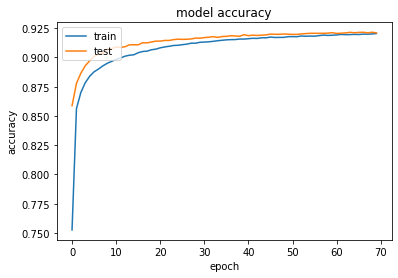

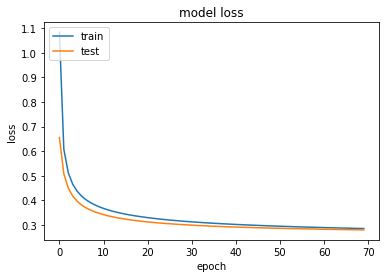

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in training
print(training.history.keys())
# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:
#evaluate the model
test_loss, test_acc = model_0.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.2827 - accuracy: 0.9210
Test accuracy: 0.9210000038146973


In [0]:
model_0.summary

<bound method Network.summary of <tensorflow.python.keras.engine.sequential.Sequential object at 0x7ffa9357af98>>

In [0]:
model_0.get_config()

{'build_input_shape': TensorShape([None, 784]),
 'layers': [{'class_name': 'Dense',
   'config': {'activation': 'softmax',
    'activity_regularizer': None,
    'batch_input_shape': (None, 784),
    'bias_constraint': None,
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'bias_regularizer': None,
    'dtype': 'float32',
    'kernel_constraint': None,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'kernel_regularizer': None,
    'name': 'dense_layer',
    'trainable': True,
    'units': 10,
    'use_bias': True}}],
 'name': 'sequential_8'}

###Improved Model 1: Adding Hidden Layer - Multi Layer Perceptron 

In [0]:
#Most common type of model is a stack of layers
model_1 = tf.keras.Sequential()
N_hidden = 64
# Adds a densely-connected layer with 64 units to the model:
model_1.add(Dense(N_hidden, name='dense_layer', input_shape=(784,), activation = 'relu'))
# Now the model will take as input arrays of shape (*, 784)# and output arrays of shape (*, 64)

# Adding another dense layer:
model_1.add(Dense(N_hidden, name='dense_layer_2', activation='relu'))
# After the first layer, you don't need to specify# the size of the input anymore:
# Add an output layer with 10 output units (10 different classes):
model_1.add(Dense(10, name='dense_layer_3', activation = 'softmax'))

In [0]:
# Compiling the model.
model_1.compile(optimizer='SGD', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
# Training the model. 
training = model_1.fit(X_train, Y_train, batch_size=64, epochs=100, validation_split=0.2) 

Epoch 1/100
750/750 [==============================] - 2s 2ms/step - loss: 1.1360 - accuracy: 0.7017 - val_loss: 0.4982 - val_accuracy: 0.8706
Epoch 2/100
750/750 [==============================] - 2s 2ms/step - loss: 0.4416 - accuracy: 0.8785 - val_loss: 0.3600 - val_accuracy: 0.8966
Epoch 3/100
750/750 [==============================] - 2s 2ms/step - loss: 0.3561 - accuracy: 0.8987 - val_loss: 0.3126 - val_accuracy: 0.9104
Epoch 4/100
750/750 [==============================] - 2s 2ms/step - loss: 0.3161 - accuracy: 0.9096 - val_loss: 0.2842 - val_accuracy: 0.9181
Epoch 5/100
750/750 [==============================] - 2s 2ms/step - loss: 0.2891 - accuracy: 0.9170 - val_loss: 0.2607 - val_accuracy: 0.9248
Epoch 6/100
750/750 [==============================] - 2s 2ms/step - loss: 0.2678 - accuracy: 0.9227 - val_loss: 0.2451 - val_accuracy: 0.9297
Epoch 7/100
750/750 [==============================] - 2s 2ms/step - loss: 0.2497 - accuracy: 0.9285 - val_loss: 0.2336 - val_accuracy: 0.9332

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


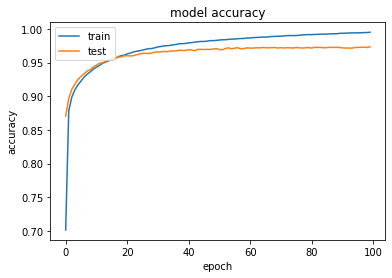

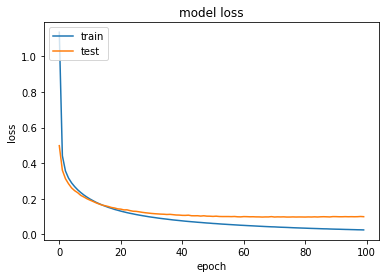

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in training
print(training.history.keys())
# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:
#evaluate the model
test_loss, test_acc = model_1.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.0935 - accuracy: 0.9737
Test accuracy: 0.9736999869346619


In [0]:
model_1.summary

<bound method Network.summary of <tensorflow.python.keras.engine.sequential.Sequential object at 0x7ffa9bc30668>>

In [0]:
model_1.weights

[<tf.Variable 'dense_layer_11/kernel:0' shape=(784, 64) dtype=float32, numpy=
 array([[-0.04788439, -0.03847154, -0.05703719, ...,  0.08058   ,
         -0.0161849 , -0.00235587],
        [-0.08180319, -0.04514312,  0.04863381, ..., -0.0084418 ,
          0.06374664, -0.07941495],
        [ 0.01456662,  0.05519008,  0.03620788, ..., -0.07124358,
         -0.07906641,  0.01951456],
        ...,
        [ 0.01247554,  0.03264432,  0.07703563, ...,  0.05831414,
          0.08260656,  0.06624896],
        [ 0.06417076, -0.06520142, -0.05924544, ...,  0.05879661,
          0.05767309, -0.07844275],
        [-0.06791287, -0.06896763,  0.08199666, ...,  0.08182254,
          0.01758599, -0.01899216]], dtype=float32)>,
 <tf.Variable 'dense_layer_11/bias:0' shape=(64,) dtype=float32, numpy=
 array([ 0.15726867, -0.01852652,  0.05473195,  0.04735076, -0.08543032,
        -0.07907983,  0.02362098,  0.1544922 ,  0.01099111,  0.2744647 ,
         0.11338007,  0.06969944,  0.1327312 ,  0.17649096, -

In [0]:
model_1.get_config()

{'build_input_shape': TensorShape([None, 784]),
 'layers': [{'class_name': 'Dense',
   'config': {'activation': 'relu',
    'activity_regularizer': None,
    'batch_input_shape': (None, 784),
    'bias_constraint': None,
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'bias_regularizer': None,
    'dtype': 'float32',
    'kernel_constraint': None,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'kernel_regularizer': None,
    'name': 'dense_layer',
    'trainable': True,
    'units': 64,
    'use_bias': True}},
  {'class_name': 'Dense',
   'config': {'activation': 'relu',
    'activity_regularizer': None,
    'bias_constraint': None,
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'bias_regularizer': None,
    'dtype': 'float32',
    'kernel_constraint': None,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'kernel_regularizer': None,
    'name': 'dense_laye

In [7]:
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential

Instructions for updating:
Colocations handled automatically by placer.
Train on 48000 samples, validate on 12000 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/100
48000/48000 [==============================] - 4s 76us/sample - loss: 0.9912 - acc: 0.7573 - val_loss: 0.4531 - val_acc: 0.8831
Epoch 2/100
48000/48000 [==============================] - 3s 69us/sample - loss: 0.4050 - acc: 0.8882 - val_loss: 0.3377 - val_acc: 0.9055
Epoch 3/100
48000/48000 [==============================] - 3s 66us/sample - loss: 0.3328 - acc: 0.9057 - val_loss: 0.2951 - val_acc: 0.9166
Epoch 4/100
48000/48000 [==============================] - 3s 58us/sample - loss: 0.2967 - acc: 0.9146 - val_loss: 0.2687 - val_acc: 0.9245
Epoch 5/100
48000/48000 [==============================] - 3s 57us/sample - loss: 0.2710 - acc: 0.9227 - val_loss: 0.2487 - val_acc: 0.9297
Epoch 6/100
48000/48000 [==============================] - 3s 62us/sample - loss: 0.2505 - acc: 0.9286 - val_loss: 0.2340 - val_ac

Epoch 55/100
48000/48000 [==============================] - 3s 62us/sample - loss: 0.0432 - acc: 0.9891 - val_loss: 0.0925 - val_acc: 0.9740
Epoch 56/100
48000/48000 [==============================] - 3s 69us/sample - loss: 0.0420 - acc: 0.9892 - val_loss: 0.0911 - val_acc: 0.9736
Epoch 57/100
48000/48000 [==============================] - 3s 71us/sample - loss: 0.0410 - acc: 0.9897 - val_loss: 0.0912 - val_acc: 0.9745
Epoch 58/100
48000/48000 [==============================] - 4s 73us/sample - loss: 0.0401 - acc: 0.9900 - val_loss: 0.0966 - val_acc: 0.9720
Epoch 59/100
48000/48000 [==============================] - 3s 72us/sample - loss: 0.0392 - acc: 0.9905 - val_loss: 0.0915 - val_acc: 0.9739
Epoch 60/100
48000/48000 [==============================] - 3s 70us/sample - loss: 0.0381 - acc: 0.9908 - val_loss: 0.0907 - val_acc: 0.9738
Epoch 61/100
48000/48000 [==============================] - 3s 72us/sample - loss: 0.0373 - acc: 0.9907 - val_loss: 0.0895 - val_acc: 0.9745
Epoch 62/100


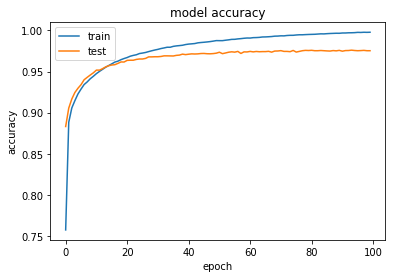

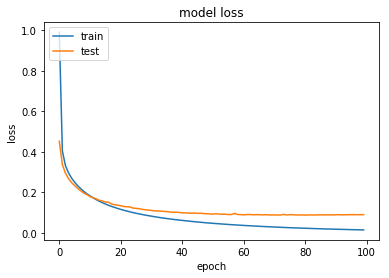

10000/10000 [==============================] - 1s 54us/sample - loss: 0.0792 - acc: 0.9766
Test accuracy: 0.9766


In [8]:
##What is the effect of adding more neurons to each hidden layer?
#Most common type of model is a stack of layers
model_t1 = tf.keras.Sequential()
N_hidden = 128
# Adds a densely-connected layer with 64 units to the model:
model_t1.add(Dense(N_hidden, name='dense_layer', input_shape=(784,), activation = 'relu'))
# Now the model will take as input arrays of shape (*, 784)# and output arrays of shape (*, 64)

# Adding another dense layer:
model_t1.add(Dense(N_hidden, name='dense_layer_2', activation='relu'))
# After the first layer, you don't need to specify# the size of the input anymore:
# Add an output layer with 10 output units (10 different classes):
model_t1.add(Dense(10, name='dense_layer_3', activation = 'softmax'))
# Compiling the model.
model_t1.compile(optimizer='SGD', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])
# Training the model. 
trainingt1 = model_t1.fit(X_train, Y_train, batch_size=64, epochs=100, validation_split=0.2)
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in training
print(trainingt1.history.keys())
# summarize training for accuracy
plt.plot(trainingt1.history['acc'])
plt.plot(trainingt1.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize traning for loss
plt.plot(trainingt1.history['loss'])
plt.plot(trainingt1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
#evaluate the model
test_loss, test_acc = model_t1.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc)

###Improved Model 2 - Adding Dropout to Avoid Overfitting

In [0]:
from tensorflow.keras.layers import Dropout

#Most common type of model is a stack of layers
model_2 = tf.keras.Sequential()
N_hidden = 128
# Adds a densely-connected layer with 64 units to the model:
model_2.add(Dense(N_hidden, name='dense_layer', input_shape=(784,), activation = 'relu'))
# Now the model will take as input arrays of shape (*, 784)# and output arrays of shape (*, 64)
model_2.add(Dropout(0.3))
# Adding another dense layer:
model_2.add(Dense(N_hidden, name='dense_layer_2', activation='relu'))
model_2.add(Dropout(0.3))

# Add an output layer with 10 output units (10 different classes):
model_2.add(Dense(10, name='dense_layer_3', activation = 'softmax'))


In [0]:
# Compiling the model.
model_2.compile(optimizer='SGD', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
# Training the model. 
training = model_2.fit(X_train, Y_train, batch_size=64, epochs=50, validation_split=0.2) 

Epoch 1/50
750/750 [==============================] - 2s 3ms/step - loss: 1.2920 - accuracy: 0.5974 - val_loss: 0.5148 - val_accuracy: 0.8725
Epoch 2/50
750/750 [==============================] - 2s 3ms/step - loss: 0.6353 - accuracy: 0.8080 - val_loss: 0.3688 - val_accuracy: 0.8972
Epoch 3/50
750/750 [==============================] - 2s 3ms/step - loss: 0.5108 - accuracy: 0.8489 - val_loss: 0.3122 - val_accuracy: 0.9096
Epoch 4/50
750/750 [==============================] - 2s 3ms/step - loss: 0.4453 - accuracy: 0.8675 - val_loss: 0.2800 - val_accuracy: 0.9183
Epoch 5/50
750/750 [==============================] - 2s 3ms/step - loss: 0.3963 - accuracy: 0.8826 - val_loss: 0.2553 - val_accuracy: 0.9242
Epoch 6/50
750/750 [==============================] - 2s 3ms/step - loss: 0.3677 - accuracy: 0.8920 - val_loss: 0.2378 - val_accuracy: 0.9302
Epoch 7/50
750/750 [==============================] - 2s 3ms/step - loss: 0.3417 - accuracy: 0.8985 - val_loss: 0.2209 - val_accuracy: 0.9352
Epoch 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


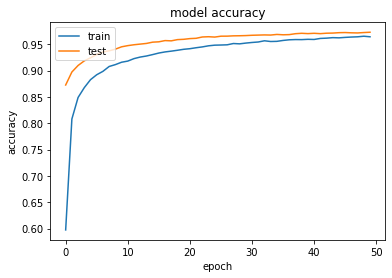

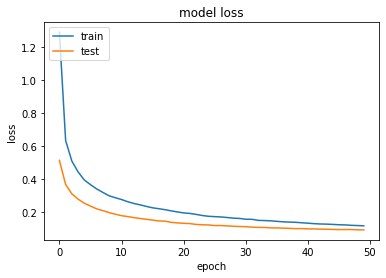

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in training
print(training.history.keys())
# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:
#evaluate the model
test_loss, test_acc = model_2.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.0870 - accuracy: 0.9728
Test accuracy: 0.9728000164031982


In [0]:
model_2.summary

<bound method Network.summary of <tensorflow.python.keras.engine.sequential.Sequential object at 0x7ffa937b9390>>

In [0]:
model_2.weights

[<tf.Variable 'dense_layer_12/kernel:0' shape=(784, 128) dtype=float32, numpy=
 array([[ 0.01444346,  0.04693794,  0.06630043, ..., -0.02828327,
          0.0066622 , -0.06228573],
        [ 0.00188328, -0.02025648,  0.05147363, ..., -0.03649226,
         -0.0791774 , -0.05140872],
        [-0.01105335,  0.07909935,  0.02207538, ...,  0.03383812,
          0.072002  ,  0.04676753],
        ...,
        [ 0.01433832,  0.02699536, -0.05973002, ..., -0.04994123,
         -0.04667233,  0.0662267 ],
        [ 0.06559644,  0.0527534 , -0.00482842, ..., -0.00990485,
          0.03639621, -0.00409852],
        [ 0.00392337, -0.05335764,  0.02810133, ...,  0.00947598,
          0.0323821 ,  0.07919947]], dtype=float32)>,
 <tf.Variable 'dense_layer_12/bias:0' shape=(128,) dtype=float32, numpy=
 array([-0.02877636, -0.07104327,  0.05942596,  0.08215805,  0.05379437,
         0.00714801, -0.13583727, -0.004012  ,  0.00470887, -0.06922098,
         0.00214812,  0.08692232,  0.03747694, -0.03114075,

In [0]:
model_2.get_config()

{'build_input_shape': TensorShape([None, 784]),
 'layers': [{'class_name': 'Dense',
   'config': {'activation': 'relu',
    'activity_regularizer': None,
    'batch_input_shape': (None, 784),
    'bias_constraint': None,
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'bias_regularizer': None,
    'dtype': 'float32',
    'kernel_constraint': None,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'kernel_regularizer': None,
    'name': 'dense_layer',
    'trainable': True,
    'units': 128,
    'use_bias': True}},
  {'class_name': 'Dropout',
   'config': {'dtype': 'float32',
    'name': 'dropout_14',
    'noise_shape': None,
    'rate': 0.3,
    'seed': None,
    'trainable': True}},
  {'class_name': 'Dense',
   'config': {'activation': 'relu',
    'activity_regularizer': None,
    'bias_constraint': None,
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'bias_regularizer': None,
    'dtype': 'float32',
  

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 6s 128us/sample - loss: 2.2217 - acc: 0.1808 - val_loss: 1.8405 - val_acc: 0.6112
Epoch 2/50
48000/48000 [==============================] - 4s 78us/sample - loss: 1.8551 - acc: 0.3455 - val_loss: 1.3458 - val_acc: 0.7736
Epoch 3/50
48000/48000 [==============================] - 4s 88us/sample - loss: 1.5719 - acc: 0.4653 - val_loss: 1.0215 - val_acc: 0.8208
Epoch 4/50
48000/48000 [==============================] - 4s 82us/sample - loss: 1.3673 - acc: 0.5490 - val_loss: 0.8232 - val_acc: 0.8604
Epoch 5/50
48000/48000 [==============================] - 4s 89us/sample - loss: 1.2370 - acc: 0.5984 - val_loss: 0.7022 - val_acc: 0.8769
Epoch 6/50
48000/48000 [==============================] - 5s 98us/sample - loss: 1.1475 - acc: 0.6296 - val_loss: 0.6257 - val_acc: 0.8823


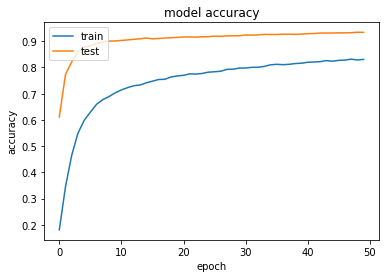

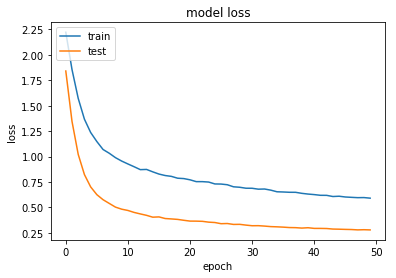

10000/10000 [==============================] - 1s 63us/sample - loss: 0.2888 - acc: 0.9315
Test accuracy: 0.9315


In [9]:
##What happens if we manipulate the value of Dropout? increasing dropout from 0.3 to 0.8
from tensorflow.keras.layers import Dropout

#Most common type of model is a stack of layers
model_t2 = tf.keras.Sequential()
N_hidden = 128
# Adds a densely-connected layer with 64 units to the model:
model_t2.add(Dense(N_hidden, name='dense_layer', input_shape=(784,), activation = 'relu'))
# Now the model will take as input arrays of shape (*, 784)# and output arrays of shape (*, 64)
model_t2.add(Dropout(0.8))
# Adding another dense layer:
model_t2.add(Dense(N_hidden, name='dense_layer_2', activation='relu'))
model_t2.add(Dropout(0.8))

# Add an output layer with 10 output units (10 different classes):
model_t2.add(Dense(10, name='dense_layer_3', activation = 'softmax'))
# Compiling the model.
model_t2.compile(optimizer='SGD', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])
# Training the model. 
trainingt2 = model_t2.fit(X_train, Y_train, batch_size=64, epochs=50, validation_split=0.2)
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in training
print(trainingt2.history.keys())
# summarize training for accuracy
plt.plot(trainingt2.history['acc'])
plt.plot(trainingt2.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize traning for loss
plt.plot(trainingt2.history['loss'])
plt.plot(trainingt2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
#evaluate the model
test_losst2, test_acct2 = model_t2.evaluate(X_test, Y_test)
print('Test accuracy:', test_acct2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 5s 107us/sample - loss: 2.3495 - acc: 0.0993 - val_loss: 2.2891 - val_acc: 0.1063
Epoch 2/50
48000/48000 [==============================] - 5s 96us/sample - loss: 2.2398 - acc: 0.1405 - val_loss: 2.1910 - val_acc: 0.2603
Epoch 3/50
48000/48000 [==============================] - 5s 96us/sample - loss: 2.1257 - acc: 0.2047 - val_loss: 2.0954 - val_acc: 0.2934
Epoch 4/50
48000/48000 [==============================] - 4s 93us/sample - loss: 2.0599 - acc: 0.2276 - val_loss: 2.0247 - val_acc: 0.3065
Epoch 5/50
48000/48000 [==============================] - 4s 92us/sample - loss: 2.0010 - acc: 0.2459 - val_loss: 1.9415 - val_acc: 0.3137
Epoch 6/50
48000/48000 [==============================] - 4s 93us/sample - loss: 1.9538 - acc: 0.2593 - val_loss: 1.8644 - val_acc: 0.3182
Epoch 7/50
48000/48000 [==============================] - 5s 94us/sample - loss: 1.9108 - acc: 0.2690 - val_loss: 1

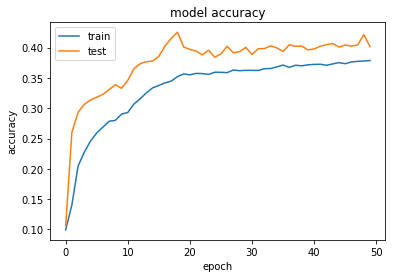

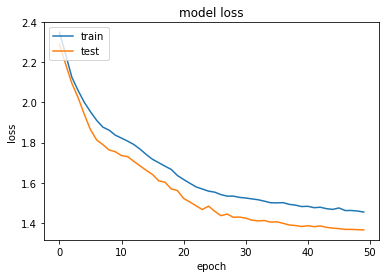

10000/10000 [==============================] - 1s 51us/sample - loss: 1.3840 - acc: 0.4024
Test accuracy: 0.4024


In [10]:
##What is the effect of adding more hiddenlayers to the network?

from tensorflow.keras.layers import Dropout

#Most common type of model is a stack of layers
model_t3 = tf.keras.Sequential()
N_hidden = 128
# Adds a densely-connected layer with 64 units to the model:
model_t3.add(Dense(N_hidden, name='dense_layer', input_shape=(784,), activation = 'relu'))
# Now the model will take as input arrays of shape (*, 784)# and output arrays of shape (*, 64)
model_t3.add(Dropout(0.8))
# Adding another dense layer:
model_t3.add(Dense(N_hidden, name='dense_layer_2', activation='relu'))
model_t3.add(Dropout(0.8))
# Adding another dense layer:
model_t3.add(Dense(N_hidden, name='dense_layer_3', activation='relu'))
model_t3.add(Dropout(0.8))
# Add an output layer with 10 output units (10 different classes):
model_t3.add(Dense(10, name='dense_layer_4', activation = 'softmax'))
# Compiling the model.
model_t3.compile(optimizer='SGD', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])
# Training the model. 
trainingt3 = model_t3.fit(X_train, Y_train, batch_size=64, epochs=50, validation_split=0.2)
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in training
print(trainingt3.history.keys())
# summarize training for accuracy
plt.plot(trainingt3.history['acc'])
plt.plot(trainingt3.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize traning for loss
plt.plot(trainingt3.history['loss'])
plt.plot(trainingt3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
#evaluate the model
test_losst3, test_acct3 = model_t3.evaluate(X_test, Y_test)
print('Test accuracy:', test_acct3)

###Improved Model 3: Changing the Optimizer - Adam

In [0]:
#Most common type of model is a stack of layers
model_3 = tf.keras.Sequential()
N_hidden = 64
# Adds a densely-connected layer with 64 units to the model:
model_3.add(Dense(N_hidden, name='dense_layer', input_shape=(784,), activation = 'relu'))
# Now the model will take as input arrays of shape (*, 784)# and output arrays of shape (*, 64)
model_3.add(Dropout(0.3))
# Adding another dense layer:
model_3.add(Dense(N_hidden, name='dense_layer_2', activation='relu'))
model_3.add(Dropout(0.3))
# After the first layer, you don't need to specify# the size of the input anymore:
# Add an output layer with 10 output units (10 different classes):
model_3.add(Dense(10, name='dense_layer_3', activation = 'softmax'))


In [0]:
# Compiling the model.
model_3.compile(optimizer='Adam', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
# Training the model. 
training = model_3.fit(X_train, Y_train, batch_size=128, epochs=20, validation_split=0.2) 


Epoch 1/20
375/375 [==============================] - 1s 4ms/step - loss: 0.7192 - accuracy: 0.7764 - val_loss: 0.2425 - val_accuracy: 0.9293
Epoch 2/20
375/375 [==============================] - 1s 3ms/step - loss: 0.3438 - accuracy: 0.8988 - val_loss: 0.1839 - val_accuracy: 0.9471
Epoch 3/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2760 - accuracy: 0.9190 - val_loss: 0.1576 - val_accuracy: 0.9545
Epoch 4/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2349 - accuracy: 0.9317 - val_loss: 0.1410 - val_accuracy: 0.9590
Epoch 5/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2114 - accuracy: 0.9373 - val_loss: 0.1280 - val_accuracy: 0.9641
Epoch 6/20
375/375 [==============================] - 1s 3ms/step - loss: 0.1975 - accuracy: 0.9423 - val_loss: 0.1252 - val_accuracy: 0.9641
Epoch 7/20
375/375 [==============================] - 1s 3ms/step - loss: 0.1817 - accuracy: 0.9462 - val_loss: 0.1213 - val_accuracy: 0.9654
Epoch 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


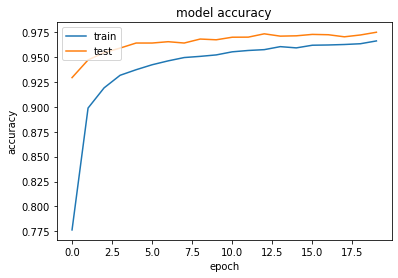

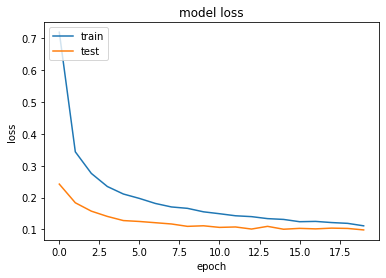

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in training
print(training.history.keys())
# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:
#evaluate the model
test_loss, test_acc = model_3.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.0966 - accuracy: 0.9723
Test accuracy: 0.9722999930381775


In [0]:
model_3.summary

<bound method Network.summary of <tensorflow.python.keras.engine.sequential.Sequential object at 0x7ffa9a49a630>>

In [0]:
model_3.weights

[<tf.Variable 'dense_layer_13/kernel:0' shape=(784, 64) dtype=float32, numpy=
 array([[-0.0470706 , -0.0605566 ,  0.05311502, ..., -0.01239798,
         -0.0326965 , -0.02283692],
        [ 0.07164595,  0.02803487, -0.02333463, ...,  0.01268711,
         -0.03852979,  0.02235638],
        [ 0.05867215, -0.01342206,  0.06247915, ...,  0.01603825,
         -0.03628643,  0.08254684],
        ...,
        [-0.01443823,  0.02990945, -0.03689074, ..., -0.03065324,
         -0.08300345, -0.03869148],
        [ 0.06107562,  0.07450309,  0.07854266, ..., -0.07303339,
         -0.01769431,  0.02703007],
        [ 0.04674842,  0.00284481, -0.06997869, ...,  0.04096612,
          0.07909941, -0.07747878]], dtype=float32)>,
 <tf.Variable 'dense_layer_13/bias:0' shape=(64,) dtype=float32, numpy=
 array([ 0.10088244,  0.18129638,  0.12534155,  0.20884629, -0.1675351 ,
         0.07976656,  0.12854438,  0.1139936 ,  0.114476  ,  0.03627298,
         0.07132903, -0.01702681,  0.12008646, -0.21088558, -

In [0]:
model_3.get_config()

{'build_input_shape': TensorShape([None, 784]),
 'layers': [{'class_name': 'Dense',
   'config': {'activation': 'relu',
    'activity_regularizer': None,
    'batch_input_shape': (None, 784),
    'bias_constraint': None,
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'bias_regularizer': None,
    'dtype': 'float32',
    'kernel_constraint': None,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'kernel_regularizer': None,
    'name': 'dense_layer',
    'trainable': True,
    'units': 64,
    'use_bias': True}},
  {'class_name': 'Dropout',
   'config': {'dtype': 'float32',
    'name': 'dropout_16',
    'noise_shape': None,
    'rate': 0.3,
    'seed': None,
    'trainable': True}},
  {'class_name': 'Dense',
   'config': {'activation': 'relu',
    'activity_regularizer': None,
    'bias_constraint': None,
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'bias_regularizer': None,
    'dtype': 'float32',
   

###Improved Model 4: Increasing the number of Hidden Layer neuron 

In [0]:
#Most common type of model is a stack of layers
model_4 = tf.keras.Sequential()
N_hidden = 512
# Adds a densely-connected layer with 64 units to the model:
model_4.add(Dense(N_hidden, name='dense_layer', input_shape=(784,), activation = 'relu'))
# Now the model will take as input arrays of shape (*, 784)# and output arrays of shape (*, 64)
model_4.add(Dropout(0.3))
# Adding another dense layer:
model_4.add(Dense(N_hidden, name='dense_layer_2', activation='relu'))
model_4.add(Dropout(0.3))
# After the first layer, you don't need to specify# the size of the input anymore:
# Add an output layer with 10 output units (10 different classes):
model_4.add(Dense(10, name='dense_layer_3', activation = 'softmax'))


In [0]:
# Compiling the model.
model_4.compile(optimizer='Adam', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
# Training the model. 
training = model_4.fit(X_train, Y_train, batch_size=128, epochs=31, validation_split=0.2) 


Epoch 1/31
375/375 [==============================] - 6s 16ms/step - loss: 0.2993 - accuracy: 0.9108 - val_loss: 0.1264 - val_accuracy: 0.9619
Epoch 2/31
375/375 [==============================] - 6s 15ms/step - loss: 0.1253 - accuracy: 0.9616 - val_loss: 0.0939 - val_accuracy: 0.9712
Epoch 3/31
375/375 [==============================] - 6s 15ms/step - loss: 0.0913 - accuracy: 0.9711 - val_loss: 0.0869 - val_accuracy: 0.9732
Epoch 4/31
375/375 [==============================] - 6s 15ms/step - loss: 0.0741 - accuracy: 0.9759 - val_loss: 0.0789 - val_accuracy: 0.9764
Epoch 5/31
375/375 [==============================] - 6s 16ms/step - loss: 0.0601 - accuracy: 0.9809 - val_loss: 0.0856 - val_accuracy: 0.9751
Epoch 6/31
375/375 [==============================] - 6s 15ms/step - loss: 0.0519 - accuracy: 0.9837 - val_loss: 0.0937 - val_accuracy: 0.9748
Epoch 7/31
375/375 [==============================] - 6s 15ms/step - loss: 0.0451 - accuracy: 0.9856 - val_loss: 0.0835 - val_accuracy: 0.9770

In [0]:
#evaluate the model_4
test_loss, test_acc = model_4.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.0831 - accuracy: 0.9824
Test accuracy: 0.9824000000953674


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


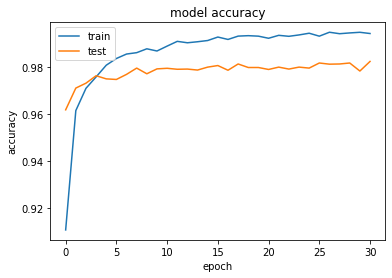

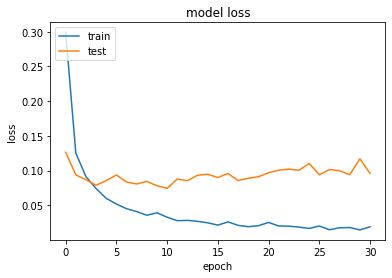

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in training
print(training.history.keys())
# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:
model_4.summary

<bound method Network.summary of <tensorflow.python.keras.engine.sequential.Sequential object at 0x7ffa93c5a438>>

In [0]:
model_4.weights

[<tf.Variable 'dense_layer_14/kernel:0' shape=(784, 512) dtype=float32, numpy=
 array([[-0.00725385, -0.02951345, -0.01022476, ...,  0.01873028,
         -0.00124576, -0.05969054],
        [-0.04041503,  0.02794901, -0.01813392, ...,  0.04797897,
         -0.05881925, -0.03724694],
        [-0.0272625 , -0.06646182,  0.01914355, ..., -0.03670435,
          0.0431502 ,  0.02895156],
        ...,
        [-0.04489559,  0.0036691 ,  0.04210217, ...,  0.04587034,
         -0.06233099,  0.03648092],
        [-0.06230009,  0.04979425, -0.0585332 , ...,  0.04988471,
          0.03459144,  0.02808205],
        [ 0.01668332,  0.05018409,  0.02200481, ...,  0.05354574,
          0.02471522, -0.03529755]], dtype=float32)>,
 <tf.Variable 'dense_layer_14/bias:0' shape=(512,) dtype=float32, numpy=
 array([-4.91322987e-02, -3.47907729e-02,  4.97164354e-02, -4.24265079e-02,
        -6.70888126e-02, -1.49358064e-02, -7.46583641e-02, -2.26146132e-02,
         2.47198083e-02, -5.43470122e-02, -1.13672033

In [0]:
model_4.get_config()

{'build_input_shape': TensorShape([None, 784]),
 'layers': [{'class_name': 'Dense',
   'config': {'activation': 'relu',
    'activity_regularizer': None,
    'batch_input_shape': (None, 784),
    'bias_constraint': None,
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'bias_regularizer': None,
    'dtype': 'float32',
    'kernel_constraint': None,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'kernel_regularizer': None,
    'name': 'dense_layer',
    'trainable': True,
    'units': 512,
    'use_bias': True}},
  {'class_name': 'Dropout',
   'config': {'dtype': 'float32',
    'name': 'dropout_18',
    'noise_shape': None,
    'rate': 0.3,
    'seed': None,
    'trainable': True}},
  {'class_name': 'Dense',
   'config': {'activation': 'relu',
    'activity_regularizer': None,
    'bias_constraint': None,
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'bias_regularizer': None,
    'dtype': 'float32',
  

###Improved Model 5: Manipulating the batch size

In [0]:
#Most common type of model is a stack of layers
model_5 = tf.keras.Sequential()
N_hidden = 512
# Adds a densely-connected layer with 64 units to the model:
model_5.add(Dense(N_hidden, name='dense_layer', input_shape=(784,), activation = 'relu'))
# Now the model will take as input arrays of shape (*, 784)# and output arrays of shape (*, 64)
model_5.add(Dropout(0.3))
# Adding another dense layer:
model_5.add(Dense(N_hidden, name='dense_layer_2', activation='relu'))
model_5.add(Dropout(0.3))
# After the first layer, you don't need to specify# the size of the input anymore:
# Add an output layer with 10 output units (10 different classes):
model_5.add(Dense(10, name='dense_layer_3', activation = 'softmax'))


In [0]:
# Compiling the model.
model_5.compile(optimizer='Adam', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
# Training the model. 
training = model_5.fit(X_train, Y_train, batch_size=64, epochs=30, validation_split=0.2) 


Epoch 1/200
750/750 [==============================] - 8s 11ms/step - loss: 0.2736 - accuracy: 0.9153 - val_loss: 0.1122 - val_accuracy: 0.9662
Epoch 2/200
750/750 [==============================] - 8s 11ms/step - loss: 0.1261 - accuracy: 0.9613 - val_loss: 0.0934 - val_accuracy: 0.9716
Epoch 3/200
750/750 [==============================] - 8s 11ms/step - loss: 0.0911 - accuracy: 0.9719 - val_loss: 0.0854 - val_accuracy: 0.9732
Epoch 4/200
750/750 [==============================] - 8s 11ms/step - loss: 0.0772 - accuracy: 0.9754 - val_loss: 0.0914 - val_accuracy: 0.9728
Epoch 5/200
750/750 [==============================] - 8s 11ms/step - loss: 0.0634 - accuracy: 0.9795 - val_loss: 0.0883 - val_accuracy: 0.9760
Epoch 6/200
750/750 [==============================] - 8s 10ms/step - loss: 0.0585 - accuracy: 0.9820 - val_loss: 0.0775 - val_accuracy: 0.9784
Epoch 7/200
750/750 [==============================] - 8s 10ms/step - loss: 0.0499 - accuracy: 0.9833 - val_loss: 0.0864 - val_accuracy:

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


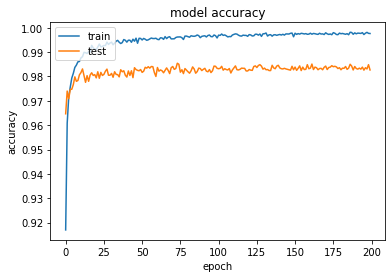

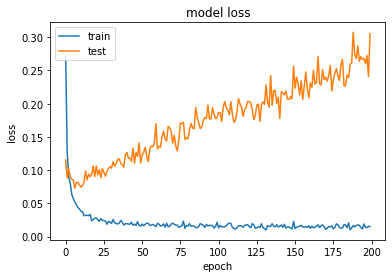

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in training
print(training.history.keys())
# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:
#evaluate the model
test_loss, test_acc = model_5.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.2712 - accuracy: 0.9846
Test accuracy: 0.9846000075340271


In [0]:
model_5.summary

<bound method Network.summary of <tensorflow.python.keras.engine.sequential.Sequential object at 0x7ffa9bc2f320>>

In [0]:
model_5.weights

[<tf.Variable 'dense_layer_7/kernel:0' shape=(784, 512) dtype=float32, numpy=
 array([[-0.0634052 ,  0.05583071, -0.02546262, ...,  0.00274961,
          0.00298132, -0.06102526],
        [ 0.02100741,  0.0560446 , -0.06592333, ...,  0.02014928,
         -0.06059694, -0.00232304],
        [-0.0110484 , -0.05735963, -0.04017337, ...,  0.04094408,
         -0.05134601, -0.05450907],
        ...,
        [-0.05346987,  0.05107909, -0.04738276, ..., -0.01198199,
          0.01172557,  0.00727127],
        [ 0.04084275, -0.05939313, -0.03691344, ...,  0.04278713,
          0.04301028, -0.03635497],
        [-0.03174385,  0.02921092,  0.02147333, ...,  0.01470637,
          0.03640424, -0.04842476]], dtype=float32)>,
 <tf.Variable 'dense_layer_7/bias:0' shape=(512,) dtype=float32, numpy=
 array([-4.83083785e-01,  1.08741231e-01, -2.22454026e-01, -4.15814281e-01,
        -1.87059343e-01, -1.19175941e-01, -2.90526420e-01, -2.54414618e-01,
        -1.71343103e-01,  2.85642684e-01, -7.67641887e-

In [0]:
model_5.get_config()

{'build_input_shape': TensorShape([None, 784]),
 'layers': [{'class_name': 'Dense',
   'config': {'activation': 'relu',
    'activity_regularizer': None,
    'batch_input_shape': (None, 784),
    'bias_constraint': None,
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'bias_regularizer': None,
    'dtype': 'float32',
    'kernel_constraint': None,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'kernel_regularizer': None,
    'name': 'dense_layer',
    'trainable': True,
    'units': 512,
    'use_bias': True}},
  {'class_name': 'Dropout',
   'config': {'dtype': 'float32',
    'name': 'dropout_6',
    'noise_shape': None,
    'rate': 0.3,
    'seed': None,
    'trainable': True}},
  {'class_name': 'Dense',
   'config': {'activation': 'relu',
    'activity_regularizer': None,
    'bias_constraint': None,
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'bias_regularizer': None,
    'dtype': 'float32',
   

###Improved Model 6: Adding Another Hidden Layer to the Model

In [11]:
#Most common type of model is a stack of layers
model_6 = tf.keras.Sequential()
N_hidden = 512

# Adds a densely-connected layer with 64 units to the model:
model_6.add(Dense(N_hidden, name='dense_layer', input_shape=(784,), activation = 'relu'))
# Now the model will take as input arrays of shape (*, 784)# and output arrays of shape (*, 64)
model_6.add(Dropout(0.3))

# Adding another dense layer:
model_6.add(Dense(N_hidden, name='dense_layer_2', activation='relu'))
model_6.add(Dropout(0.3))

# Adding another dense layer:
model_6.add(Dense(N_hidden, name='dense_layer_3', activation='relu'))
model_6.add(Dropout(0.3))

# Add an output layer with 10 output units (10 different classes):
model_6.add(Dense(10, name='dense_layer_4', activation = 'softmax'))


In [12]:
# Compiling the model.
model_6.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [13]:
# Training the model. 
training = model_6.fit(X_train, Y_train, batch_size=64, epochs=30, validation_split=0.2) 

Train on 48000 samples, validate on 12000 samples
Epoch 1/30
48000/48000 [==============================] - 26s 535us/sample - loss: 0.3025 - acc: 0.9085 - val_loss: 0.1413 - val_acc: 0.9624
Epoch 2/30
48000/48000 [==============================] - 27s 570us/sample - loss: 0.1560 - acc: 0.9565 - val_loss: 0.1247 - val_acc: 0.9680
Epoch 3/30
48000/48000 [==============================] - 26s 542us/sample - loss: 0.1406 - acc: 0.9631 - val_loss: 0.1158 - val_acc: 0.9728
Epoch 4/30
48000/48000 [==============================] - 26s 542us/sample - loss: 0.1318 - acc: 0.9680 - val_loss: 0.1093 - val_acc: 0.9746
Epoch 5/30
48000/48000 [==============================] - 27s 570us/sample - loss: 0.1311 - acc: 0.9704 - val_loss: 0.1267 - val_acc: 0.9730
Epoch 6/30
48000/48000 [==============================] - 26s 541us/sample - loss: 0.1316 - acc: 0.9725 - val_loss: 0.1308 - val_acc: 0.9737
Epoch 7/30
48000/48000 [==============================] - 27s 564us/sample - loss: 0.1358 - acc: 0.9725 

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


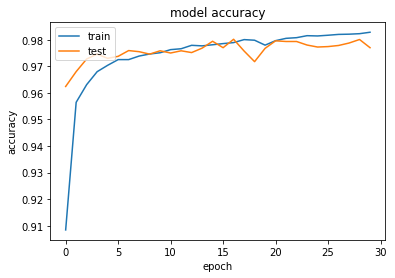

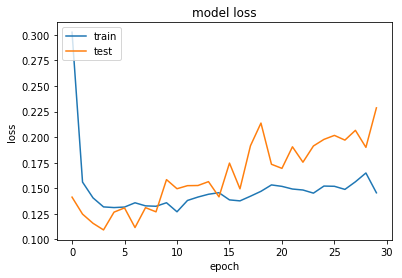

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in training
print(training.history.keys())
# summarize training for accuracy
plt.plot(training.history['acc'])
plt.plot(training.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [16]:
#evaluate the model
test_loss, test_acc = model_6.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc)

10000/10000 [==============================] - 2s 183us/sample - loss: 0.2012 - acc: 0.9798
Test accuracy: 0.9798


In [0]:
model_6.summary

<bound method Network.summary of <tensorflow.python.keras.engine.sequential.Sequential object at 0x7ffa9a1c0b00>>

In [0]:
model_6.weights

[<tf.Variable 'dense_layer_8/kernel:0' shape=(784, 512) dtype=float32, numpy=
 array([[-0.02043436, -0.03052251, -0.04867187, ..., -0.00341104,
          0.0646666 ,  0.06193061],
        [ 0.00580537, -0.03989251,  0.02505963, ...,  0.00726219,
         -0.03476311, -0.04609244],
        [ 0.02528511, -0.0624702 ,  0.02157883, ...,  0.02244397,
         -0.00719848,  0.04892342],
        ...,
        [ 0.03892381,  0.06000207,  0.02830688, ..., -0.03362466,
         -0.06500859, -0.02711738],
        [-0.062404  ,  0.04495282,  0.00313219, ...,  0.05914421,
         -0.0092866 , -0.01132109],
        [-0.04838803, -0.00661732,  0.05316094, ...,  0.05458824,
         -0.0405038 ,  0.02893919]], dtype=float32)>,
 <tf.Variable 'dense_layer_8/bias:0' shape=(512,) dtype=float32, numpy=
 array([-0.2696233 , -0.21055523, -0.33684137, -0.42744735,  0.18318221,
        -0.27374473, -0.4295545 , -0.4989392 , -0.40381438, -0.0173907 ,
        -0.02753447, -0.14542247, -0.69777596, -0.59039474, -

In [0]:
model_6.get_config()

{'build_input_shape': TensorShape([None, 784]),
 'layers': [{'class_name': 'Dense',
   'config': {'activation': 'relu',
    'activity_regularizer': None,
    'batch_input_shape': (None, 784),
    'bias_constraint': None,
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'bias_regularizer': None,
    'dtype': 'float32',
    'kernel_constraint': None,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'kernel_regularizer': None,
    'name': 'dense_layer',
    'trainable': True,
    'units': 512,
    'use_bias': True}},
  {'class_name': 'Dropout',
   'config': {'dtype': 'float32',
    'name': 'dropout_8',
    'noise_shape': None,
    'rate': 0.3,
    'seed': None,
    'trainable': True}},
  {'class_name': 'Dense',
   'config': {'activation': 'relu',
    'activity_regularizer': None,
    'bias_constraint': None,
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'bias_regularizer': None,
    'dtype': 'float32',
   

Train on 48000 samples, validate on 12000 samples
Epoch 1/100
48000/48000 [==============================] - 4s 89us/sample - loss: 1.1647 - acc: 0.6682 - val_loss: 0.8848 - val_acc: 0.7417
Epoch 2/100
48000/48000 [==============================] - 4s 77us/sample - loss: 0.8922 - acc: 0.7188 - val_loss: 0.8097 - val_acc: 0.7352
Epoch 3/100
48000/48000 [==============================] - 4s 78us/sample - loss: 1.0000 - acc: 0.6743 - val_loss: 1.1058 - val_acc: 0.5843
Epoch 4/100
48000/48000 [==============================] - 4s 78us/sample - loss: 1.1674 - acc: 0.6023 - val_loss: 1.3369 - val_acc: 0.5498
Epoch 5/100
48000/48000 [==============================] - 4s 78us/sample - loss: 1.1905 - acc: 0.6113 - val_loss: 1.1211 - val_acc: 0.6319
Epoch 6/100
48000/48000 [==============================] - 4s 77us/sample - loss: 1.3005 - acc: 0.5860 - val_loss: 1.3230 - val_acc: 0.5263
Epoch 7/100
48000/48000 [==============================] - 4s 79us/sample - loss: 1.2585 - acc: 0.5811 - val_l

48000/48000 [==============================] - 4s 80us/sample - loss: 1.4947 - acc: 0.4802 - val_loss: 1.4556 - val_acc: 0.4897
Epoch 59/100
48000/48000 [==============================] - 4s 74us/sample - loss: 1.5602 - acc: 0.4428 - val_loss: 1.6369 - val_acc: 0.4112
Epoch 60/100
48000/48000 [==============================] - 4s 78us/sample - loss: 1.6049 - acc: 0.4241 - val_loss: 1.5121 - val_acc: 0.4971
Epoch 61/100
48000/48000 [==============================] - 4s 77us/sample - loss: 1.5434 - acc: 0.4700 - val_loss: 1.5865 - val_acc: 0.4942
Epoch 62/100
48000/48000 [==============================] - 3s 67us/sample - loss: 1.6261 - acc: 0.4774 - val_loss: 1.5008 - val_acc: 0.4952
Epoch 63/100
48000/48000 [==============================] - 3s 69us/sample - loss: 1.5452 - acc: 0.4781 - val_loss: 1.5676 - val_acc: 0.4787
Epoch 64/100
48000/48000 [==============================] - 4s 81us/sample - loss: 1.7079 - acc: 0.4609 - val_loss: 1.5618 - val_acc: 0.4681
Epoch 65/100
48000/48000 [

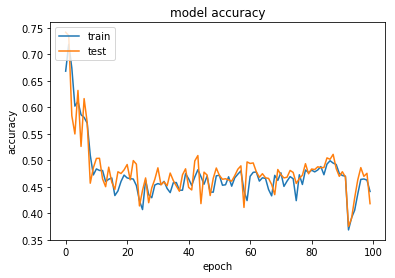

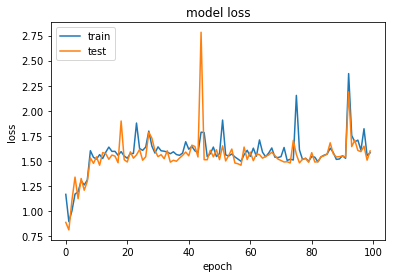

In [18]:
from tensorflow.keras.optimizers import RMSprop, Adam
from tensorflow.keras.layers import Dropout
#Most common type of model is a stack of layers
model_6t = tf.keras.Sequential()
N_hidden = 64

# Adds a densely-connected layer with 64 units to the model:
model_6t.add(Dense(N_hidden, name='dense_layer', input_shape=(784,), activation = 'relu'))
# Now the model will take as input arrays of shape (*, 784)# and output arrays of shape (*, 64)

# Add an output layer with 10 output units (10 different classes):
model_6t.add(Dense(10, name='dense_layer_4', activation = 'softmax'))
# Compiling the model.
rmsprop = Adam(lr=0.1)
model_6t.compile(optimizer= rmsprop, 
              loss='categorical_crossentropy',
              metrics=['accuracy'])
training6t = model_6t.fit(X_train, Y_train, batch_size=64, epochs=100, validation_split=0.2) 
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in training
print(training6t.history.keys())
# summarize training for accuracy
plt.plot(training6t.history['acc'])
plt.plot(training6t.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize traning for loss
plt.plot(training6t.history['loss'])
plt.plot(training6t.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# DIY: Assignment

####**Total Marks: 50**
**Duration: 6 days**

As a part of this assignment following are the list of task that may help  improve your skills with TensorFlow. It is important to get hands-on experience with TensorFlow in order to learn how to use it properly.

You may want to backup this Notebook before making any changes.


###**`.ipynb file 1`** 


**Marks: 10**
> - Do you get the exact same results if you run the Notebook multiple times without changing any parameters?
- What is the effect of adding more neurons to each hidden layer?
- What happens if we manipulate the value of dropout?
- What is the effect of adding more hidden layer to the network?
- What is the accuracy score if we use RMSprop for model 6?
- Does manipulating the learning rate affect the model? Justify your answer.
- What is the best parameter configuration for this project?


###**`.ipynb file 2`** 


**Marks: 15**
>- Try improving the model and re-code the program from scratch without looking too much at this source-code.
- Write up a summary explaining how your program works.


###**`.ipynb file 3`**



**Marks: 25**
>**Problem Statement**<br>
The dataset is similar to MNIST, but includes images of certain clothing and accessory. The objective is to classify images into specific classes using single layer perceptron and multilayer perceptron.<br>
<br>
**Dataset Description**
- Total Images: 70,000 
- Train Images: 60,000 
- Test Images: 10,000 
- Image Size: 28 X 28 
- Classes: 'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot' 

>**Tasks to be Performed:**
As a part of this assignment you will be performing the following tasks:
- Prepare a detailed python notebook(similar to this one) using muli-layer perceptron for classifing the images from [MNIST Fashion Dataset ](https://github.com/zalandoresearch/fashion-mnist) with best accuracy
- Prepare the dataset for the model
- Develop Single Layer Perceptron model for classifying the handwritten digits
- Plot the change in accuracy per epochs
- Evaluate the model on the testing data
- Analyse the model summary
- Add hidden layer to the model to make it Multi-Layer Perceptron
- Add Dropout to prevent overfitting and check its effect on accuracy
- Increasing the number of Hidden Layer neuron and check its effect on accuracy
- Use different optimizers and check its effect on accuracy
- Increase the hidden layers and check its effect on accuracy
- Manipulate the batch_size and epochs and check its effect on accuracy

**Answer:** What parameters should be choosen to get best accuracy on classifying the images into various categories?
 